In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv("SalesData.csv")

In [3]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


### 1. Compare Sales by region for 2016 with 2015 using bar chart

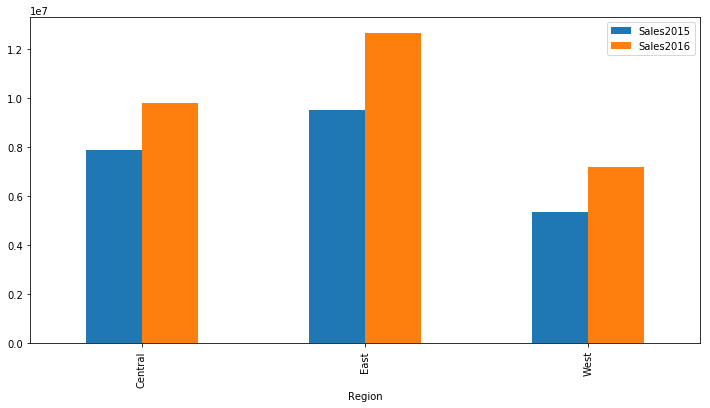

In [4]:
sales1 = sales.groupby('Region')['Sales2015','Sales2016'].sum()
sales1graph=sales1.plot.bar(figsize=(12,6))

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E04B736A90>],
      dtype=object)

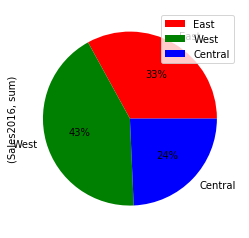

In [5]:
sales2 = sales.groupby(['Region']).aggregate({'Sales2016':['sum']})

sales2.plot(kind='pie', 
            labels=['East','West','Central'], 
            colors=['r', 'g', 'b'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true')

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

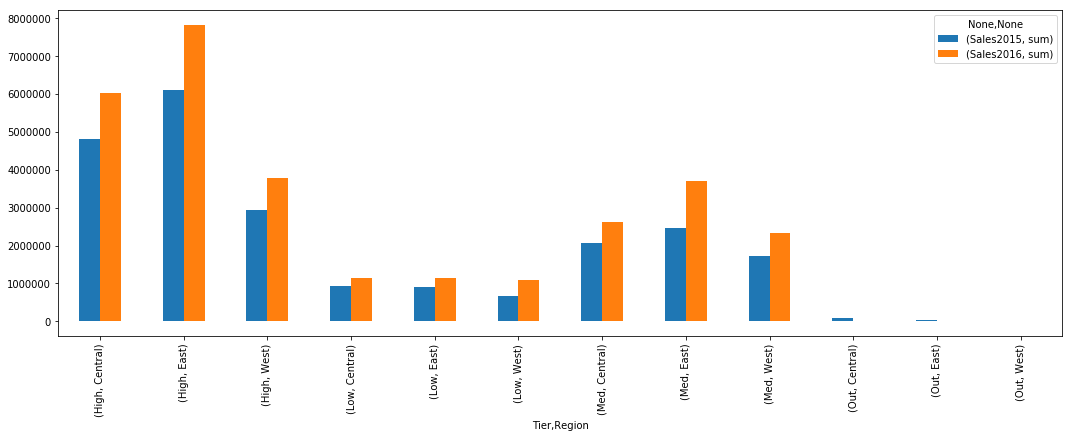

In [6]:
sales3 = sales.groupby(['Tier','Region']).aggregate({'Sales2015':['sum'],'Sales2016':['sum']})
sales3graph=sales3.plot.bar(figsize=(18,6))

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

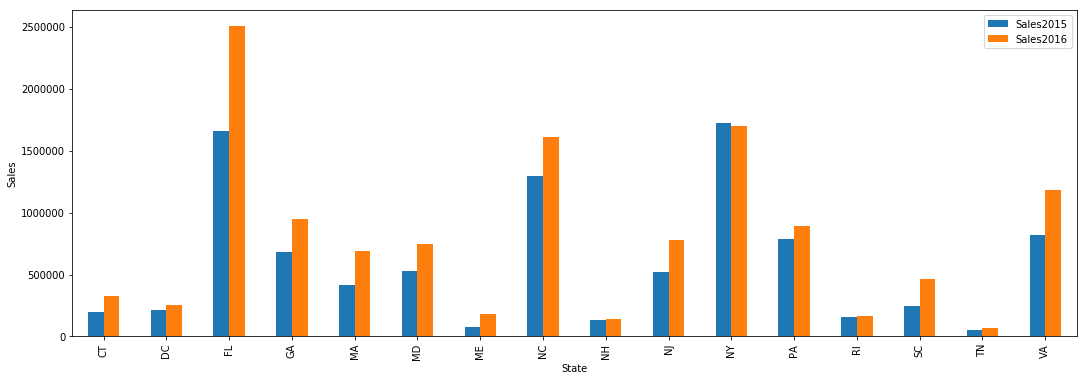

In [7]:
sl = sales.loc[(sales.Region == 'East')]
sales4 = sl.groupby('State')['Sales2015','Sales2016'].sum()

sales4graph=sales4.plot.bar(figsize=(18,6))
plt.legend()
plt.ylabel('Sales')
plt.show()

In [8]:
#In East region,"NY" state registered a decline in 2016 as compared to 2015

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

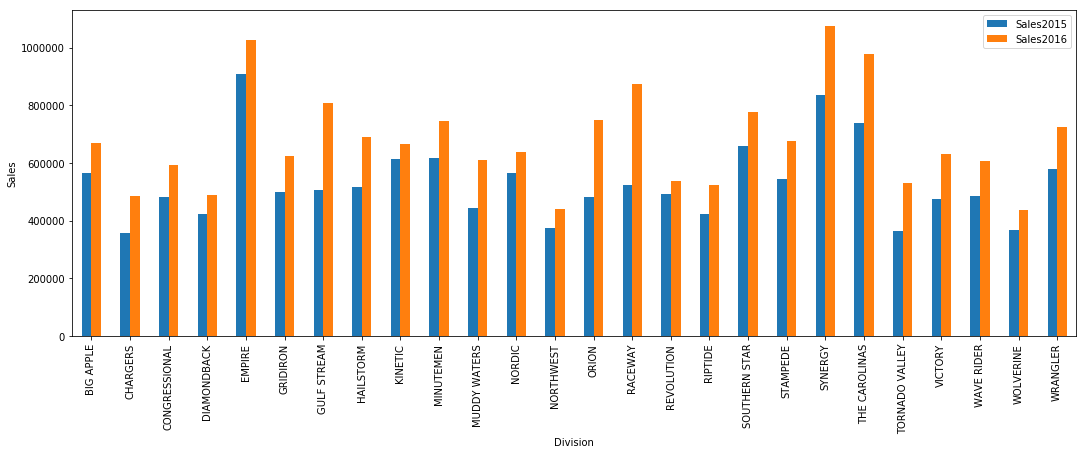

In [9]:
sls = sales.loc[(sales.Tier == 'High')]
sales5 = sls.groupby('Division')['Sales2015','Sales2016'].sum()
sales5graph=sales5.plot.bar(figsize=(18,6))
plt.legend()
plt.ylabel('Sales')
plt.show()

In [10]:
# No division saw a decline in number of units sold in 2016 compared to 2015.

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [11]:
sales.loc[(sales.Month == 'Jan') | (sales.Month == 'Feb') | (sales.Month == 'Mar'),'Qtr'] = 'Q1'
sales.loc[(sales.Month == 'Apr') | (sales.Month == 'May') | (sales.Month == 'Jun'),'Qtr'] = 'Q2'
sales.loc[(sales.Month == 'Jul') | (sales.Month == 'Aug') | (sales.Month == 'Sep'),'Qtr'] = 'Q3'
sales.loc[(sales.Month == 'Oct') | (sales.Month == 'Nov') | (sales.Month == 'Dec'),'Qtr'] = 'Q4'

In [12]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


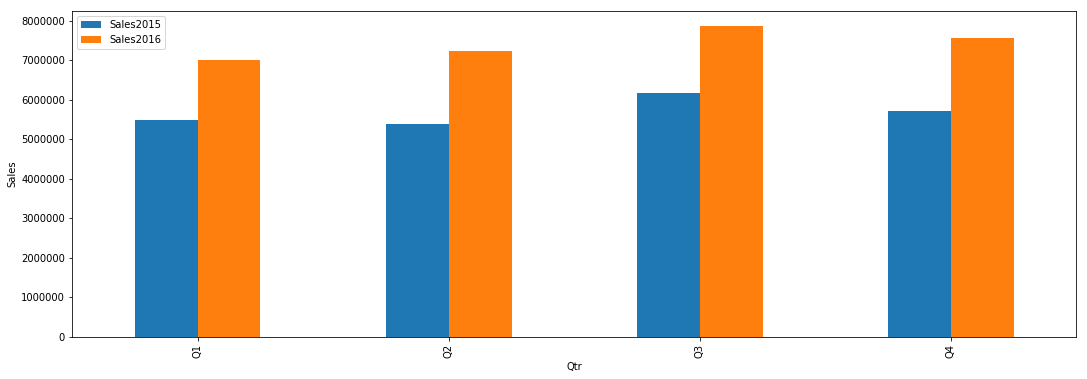

In [13]:
sales6=sales.groupby('Qtr')['Sales2015','Sales2016'].sum()
sales6graph=sales6.plot.bar(figsize=(18,6))
plt.legend()
plt.ylabel('Sales')
plt.show()

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [14]:
sales8 = sales[sales['Tier']!='Out']
sales8 = sales8.groupby(['Tier','Qtr']).aggregate({'Sales2016':['sum']})
sales8 = sales8.round(decimals=0)
sales8 = sales8.stack() # long to wide data
sales8 = sales8.unstack(level=0)
sales8

Sales2016                     
Tier          High       Low        Med
Qtr                                    
Q1  sum  3867719.0  948833.0  2181402.0
Q2  sum  4130953.0  890595.0  2215814.0
Q3  sum  4872559.0  795178.0  2197058.0
Q4  sum  4740002.0  742659.0  2085207.0

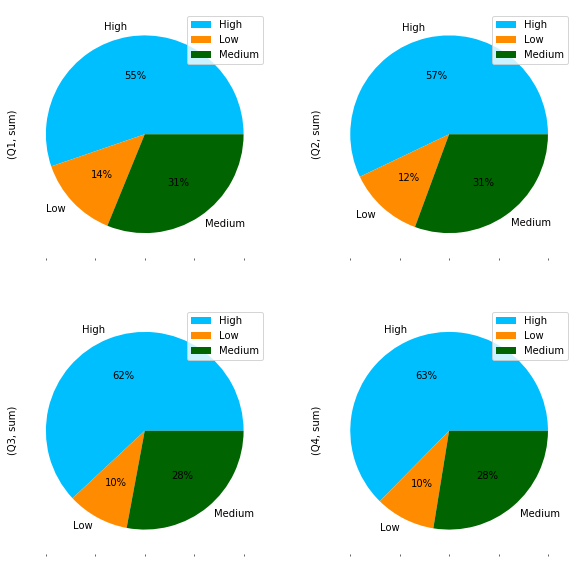

In [15]:
sales8.T.plot(kind='pie', 
            labels=['High', 'Low', 'Medium'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()